# 01 – Dataset Introduction and Overview
## **1.1 – Introduction and Objective**
In this notebook, we will:
1. Load the **<u>Student Performance Factors</u>** dataset.
2. Explore its structure, data types, and column meanings.
3. Generate summary statistics and initial insights to guide further cleaning and analysis.

The goal is to understand the dataset’s quality and identify
key variables that influence student academic performance,
such as study hours, sleep hours, attendance, and motivation level.

## **1.2 – Dataset Loading and Preview**

In this section, we will load the dataset from the local `data/` folder,
examine its structure, and display a few rows to confirm that the data has been read correctly.

The dataset used in this analysis is **<u>StudentPerformanceFactors.csv</u>**,
which contains information approximately **<u>6,600 students</u>**, including their study habits,
attendance, parental involvement, motivation level, sleep hours, and access to resources.


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load dataset
data_path = Path("../data/StudentPerformanceFactors.csv")
df = pd.read_csv(data_path)

print(f"Dataset's Shape is {df.shape[0]} rows × {df.shape[1]} columns")

print(df.tail()) # Preview of the last 5 records to verify total rows and index

print(f"Verified total records: {len(df)} students")



Dataset's Shape is 6607 rows × 20 columns
      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
6602                         No            7               76   
6603                         No            8               81   
6604                        Yes            6               65   
6605                        Yes            6               91   
6606                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
6602           Medium             Ye

## 1.3 – Basic Information and Missing Value Check

In this section, we will:
1. Review the dataset’s basic structure and data types using `df.info()`.
2. Display summary statistics for numerical columns using `df.describe()`.
3. Check for missing values to ensure data completeness before analysis.

This step helps confirm that the dataset is clean and ready for deeper exploration.


In [17]:
# --- Basic Information ---
print("--------------------------------------------------")
print("Dataset Info:")
print("--------------------------------------------------")
df.info()

# --- Summary Statistics for Numeric Columns ---
print("\n--------------------------------------------------")
print("Summary Statistics for Numeric Columns:")
print("--------------------------------------------------")
print(df.describe())

# --- Check Missing Values ---
print("\n--------------------------------------------------")
print("Missing Values Summary:")
print("--------------------------------------------------")
missing = df.isnull().sum()

total_missing = missing.sum()
percent_missing = (total_missing / (df.shape[0] * df.shape[1])) * 100

if total_missing > 0:
    print(missing[missing > 0])
else:
    print("No missing values found!")

print(f"\nTotal missing values: {total_missing} ({percent_missing:.2f}% of all data)")



--------------------------------------------------
Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   

**Notes:**
- `df.info()` shows the data types and non-null counts, helping us identify categorical and numeric variables.
- `df.describe()` provides quick summary statistics such as mean, min, max, and standard deviation.
- Missing value check ensures there are no incomplete records before performing visual or statistical analysis.
- The dataset has 235 missing values in total (≈0.18% of all data), which indicates a <u>**high level of completeness**</u> .
  These missing values will be handled in the next section.



## 1.4 – Handling Missing Values

In this section, we will handle the missing data identified earlier to ensure dataset completeness and consistency.

### Objectives
1. Visualize missing data patterns to identify where gaps occur.
2. Apply suitable strategies to handle missing values (e.g., removal or imputation).
3. Verify the results to confirm the dataset is clean for further analysis.

We will use both visual and programmatic checks to ensure data quality before continuing to feature analysis.


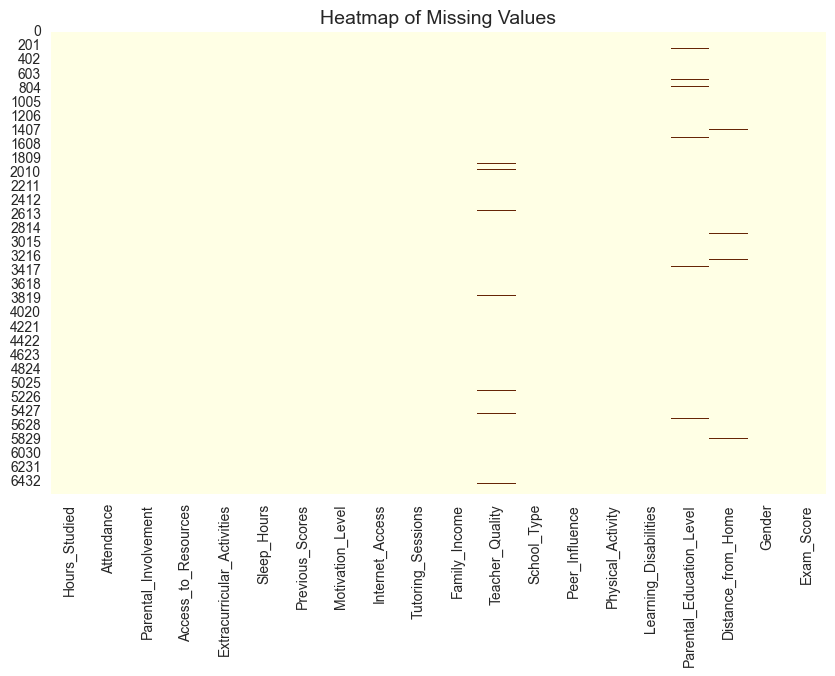

Total missing values after cleaning: 0
Shape before: (6607, 20)
Shape after : (6378, 20)


In [19]:
# --- Visualize Missing Data ---

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='YlOrBr')
plt.title("Heatmap of Missing Values", fontsize=14)
plt.show()

# --- Handle Missing Data ---

# Option 1: Drop rows with missing values (if minimal impact)
df_cleaned = df.dropna()

# Option 2 (alternative): Fill missing values if needed
# df_cleaned = df.fillna(df.median(numeric_only=True))

# --- Verify Results ---

missing_after = df_cleaned.isnull().sum().sum()
print(f"Total missing values after cleaning: {missing_after}")

print(f"Shape before: {df.shape}")
print(f"Shape after : {df_cleaned.shape}")


## Notes:
- The heatmap helps visualize the distribution of missing values across columns.
  The missing values are mainly in <u>**Teacher_Quality**</u>, <u>**Parental_Education_Level**</u>, and <u>**Distance_from_Home**</u>.
- Since only ~0.18% of data was missing, we safely removed those rows using `dropna()`.
- The cleaned dataset (`df_cleaned`) now contains <u>**no missing values**</u>, ensuring data integrity for further analysis.

